# Interpolation

## Background

- Image Scaling: How to fill the pixel value of the gap position?
- How to calculate the pixel value for a location with non-integer coordinates?
- Interpolation process in three steps: 
    1. Map the coordinates of the image after interpolation to the coordinates of the image before interpolation;
    2. Calculate the pixel value of the mapped coordinate position according to a given interpolation algorithm; (core)
    3. Assign the pixel value calculated in 2. to the image after interpolation.

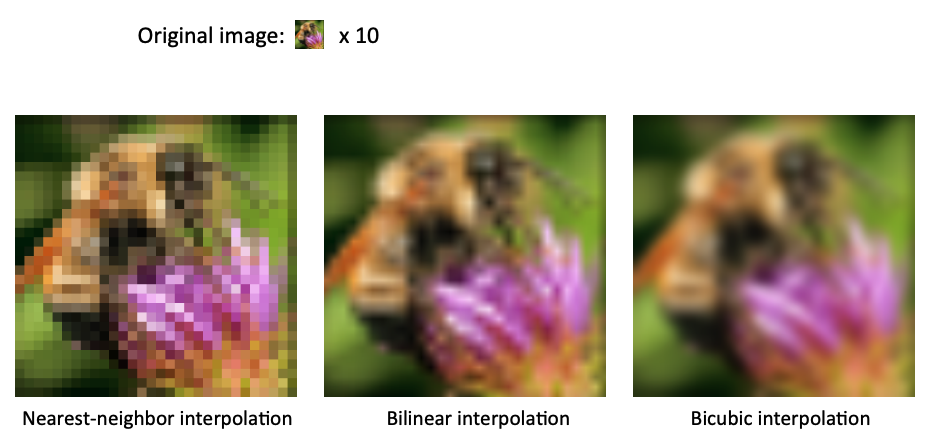

## Nearest-neighbor Interpolation
### Basics Introduction

1. After mapping the point in the target image to the original image, find the pixel value of the nearest integer coordinate point and output it as the pixel value of the point;

2. As shown in the figure below, the point closest to $P$ is $Q11$. At this time, $f(P)=f(Q11)$.

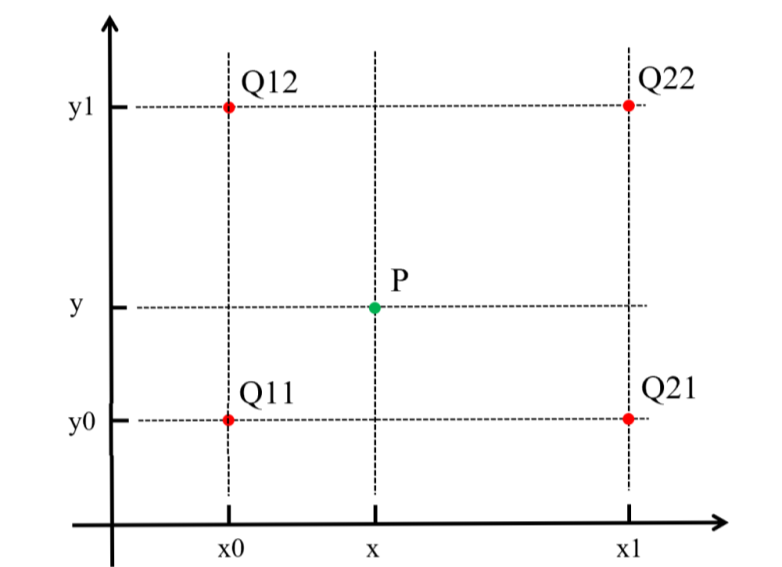

### Example

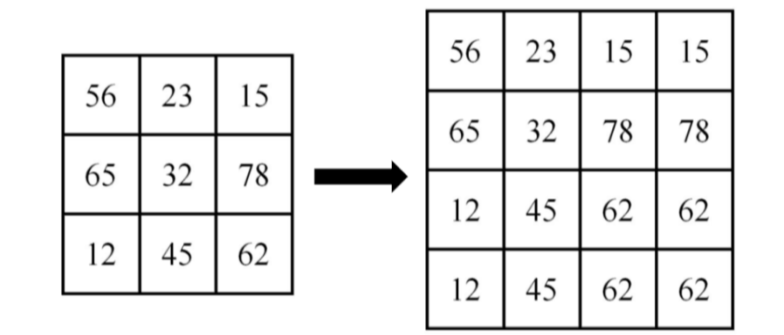

1. Enlarge a $3 \times 3$ image to $4 \times 4$, use $s(x,y)$ to represent the original image, $t(x,y)$ to represent the target image, $w_s$ and $h_s$ donote the width and height of the original image, $w_t$ and $h_t$ donote the width and height of the target image;
2. $t(x,y) = s(round(\frac{w_s}{w_t}·x), round(\frac{h_s}{h_t}·y))$;
3. $t(0,0) = s(0,0)$;
4. $t(0,1) = s(0,round(0.75)) = s(0,1)$;
5. $t(0,2) = s(0,round(1.5)) = s(0,2)$;
6. $t(0,3) = s(0,round(2.25)) = s(0,2)$.

### Code Example

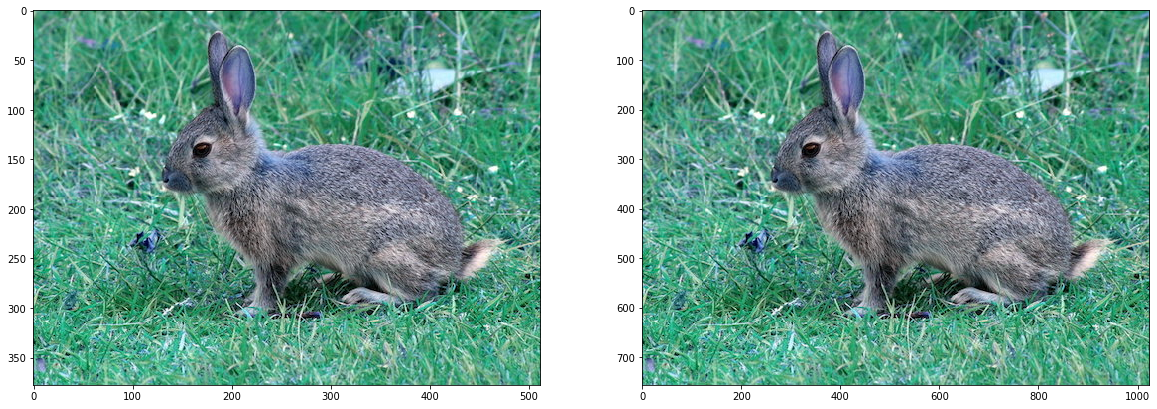

In [14]:
import cv2
import matplotlib.pyplot as plt

image_rab     = cv2.imread('./rabbit.jpg')
H, W, C       = image_rab.shape
image_nearest = cv2.resize(image_rab, dsize=(2*W, 2*H), interpolation=cv2.INTER_NEAREST)
cv2.imwrite('rabbit_nearest.jpg', image_nearest)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image_rab)
plt.subplot(122)
plt.imshow(image_nearest)
plt.show()

### Shortcoming

- The image enlarged by the neares-neighbor interpolation method has very serious mosaic, and there will be obvious block effect; the reduced image has serious distortion.

- The pixel value of each pixel after transformation is only determined by one pixel in the original image. Using the same example above, the pixel of point (0,0.75) is only determined by (0,1), so the effect is obviously not good. The pixel at point (0,0.75) is not only related to (0,1), but also related to (0,0), but (0,1) has a greater influence. 

If you can use several nearest pixels to assign weights to determine the pixels of a certain point in the target image, the interpolation effects will be better.

## Bilinear Interpolation 

### Linear Interpolation
- Linear Interpolation: using a straight line connecting two known quantities to determine the value of an unknown quantity between the two known quantities;
- $y = y_0 + \frac{y_1 - y_0}{x_1 - x_0}(x-x_0) = \frac{y_1 - y_0}{x_1 - x_0}x + (y_0 - \frac{y_1 - y_0}{x_1 - x_0}x_0)$;
- Linear interpolation form: $y = a_1x + a_0$.

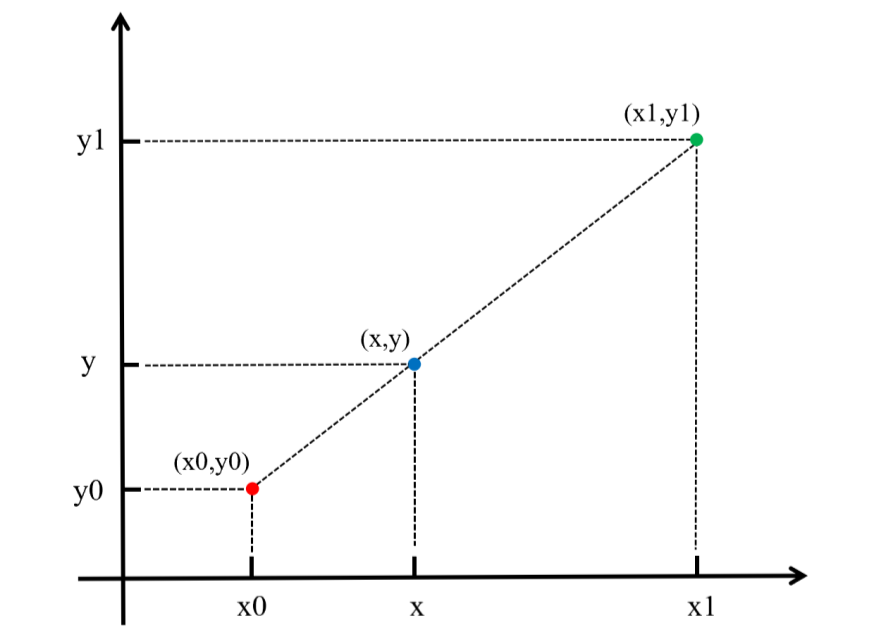

### Bilinear Interpolation

- $f(x,y)$ is a binary function. Suppose we know the values of four points $f(x_0,y_0)$, $f(x_1,y_1)$, $f(x_0,y_1)$, and $f(x_1,y_0)$. These four points determine a rectangle. We obtain the function value of any point in the rectangle through interpolation.
- Bilinear interpolation is the extension of linear interpolation in two dimensions. A total of three linear interpolations are performed in two directions. The specific operation is to perform two linear interpolation calculations in the $x$ direction, and then perform an interpolation calculation in the $y$ direction.
- First perform two linear interpolations in the $x$ direction to obtain
$$f(x, y_0) = \frac{x_1 - x}{x_1 - x_0}f(x_0, y_0) + \frac{x - x_0}{x_1 - x_0}f(x_1, y_0),$$
$$f(x, y_1) = \frac{x_1 - x}{x_1 - x_0}f(x_0, y_1) + \frac{x - x_0}{x_1 - x_0}f(x_1, y_1).$$
- Then perform one linear interpolation along the $y$ direction to obtain
$$f(x, y) = \frac{y_1 - y}{y_1 - y_0}f(x, y_0) + \frac{y - x_0}{y_1 - y_0}f(x, y_1),$$
$$f(x, y) = ax+by+cxy+d.$$

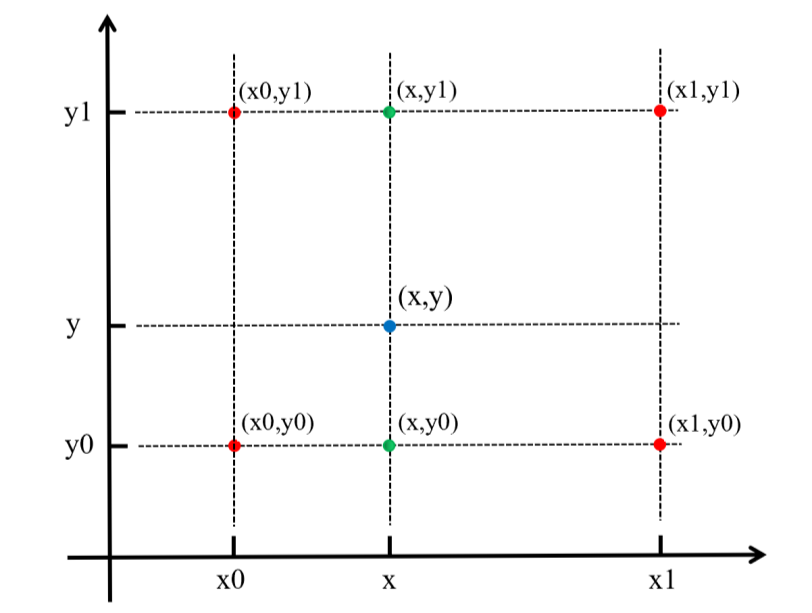

### Code Example

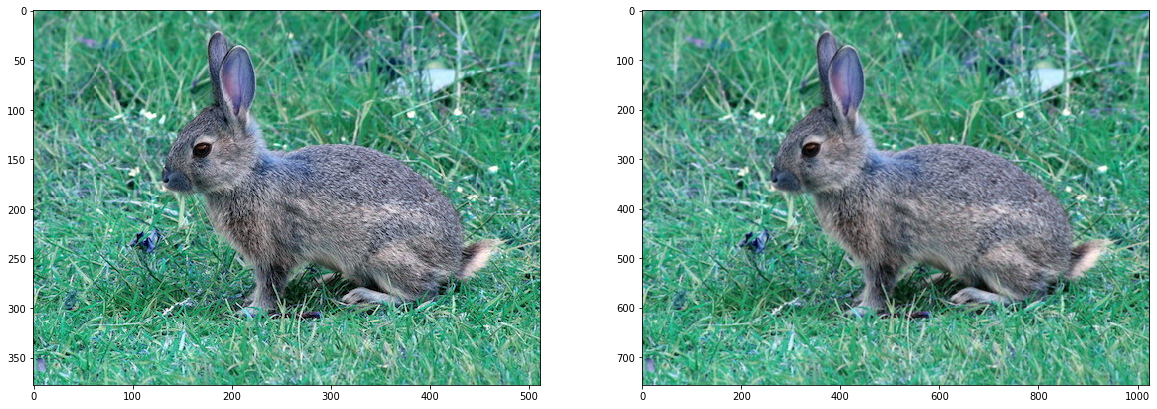

In [2]:
import cv2
import matplotlib.pyplot as plt

image_rab     = cv2.imread('./rabbit.jpg')
H, W, C       = image_rab.shape
image_linear  = cv2.resize(image_rab, dsize=(2*W, 2*H), interpolation=cv2.INTER_LINEAR)
cv2.imwrite('rabbit_linear.jpg', image_linear)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image_rab)
plt.subplot(122)
plt.imshow(image_linear)
plt.show()

# Bicubic Interpolation

## Introduction

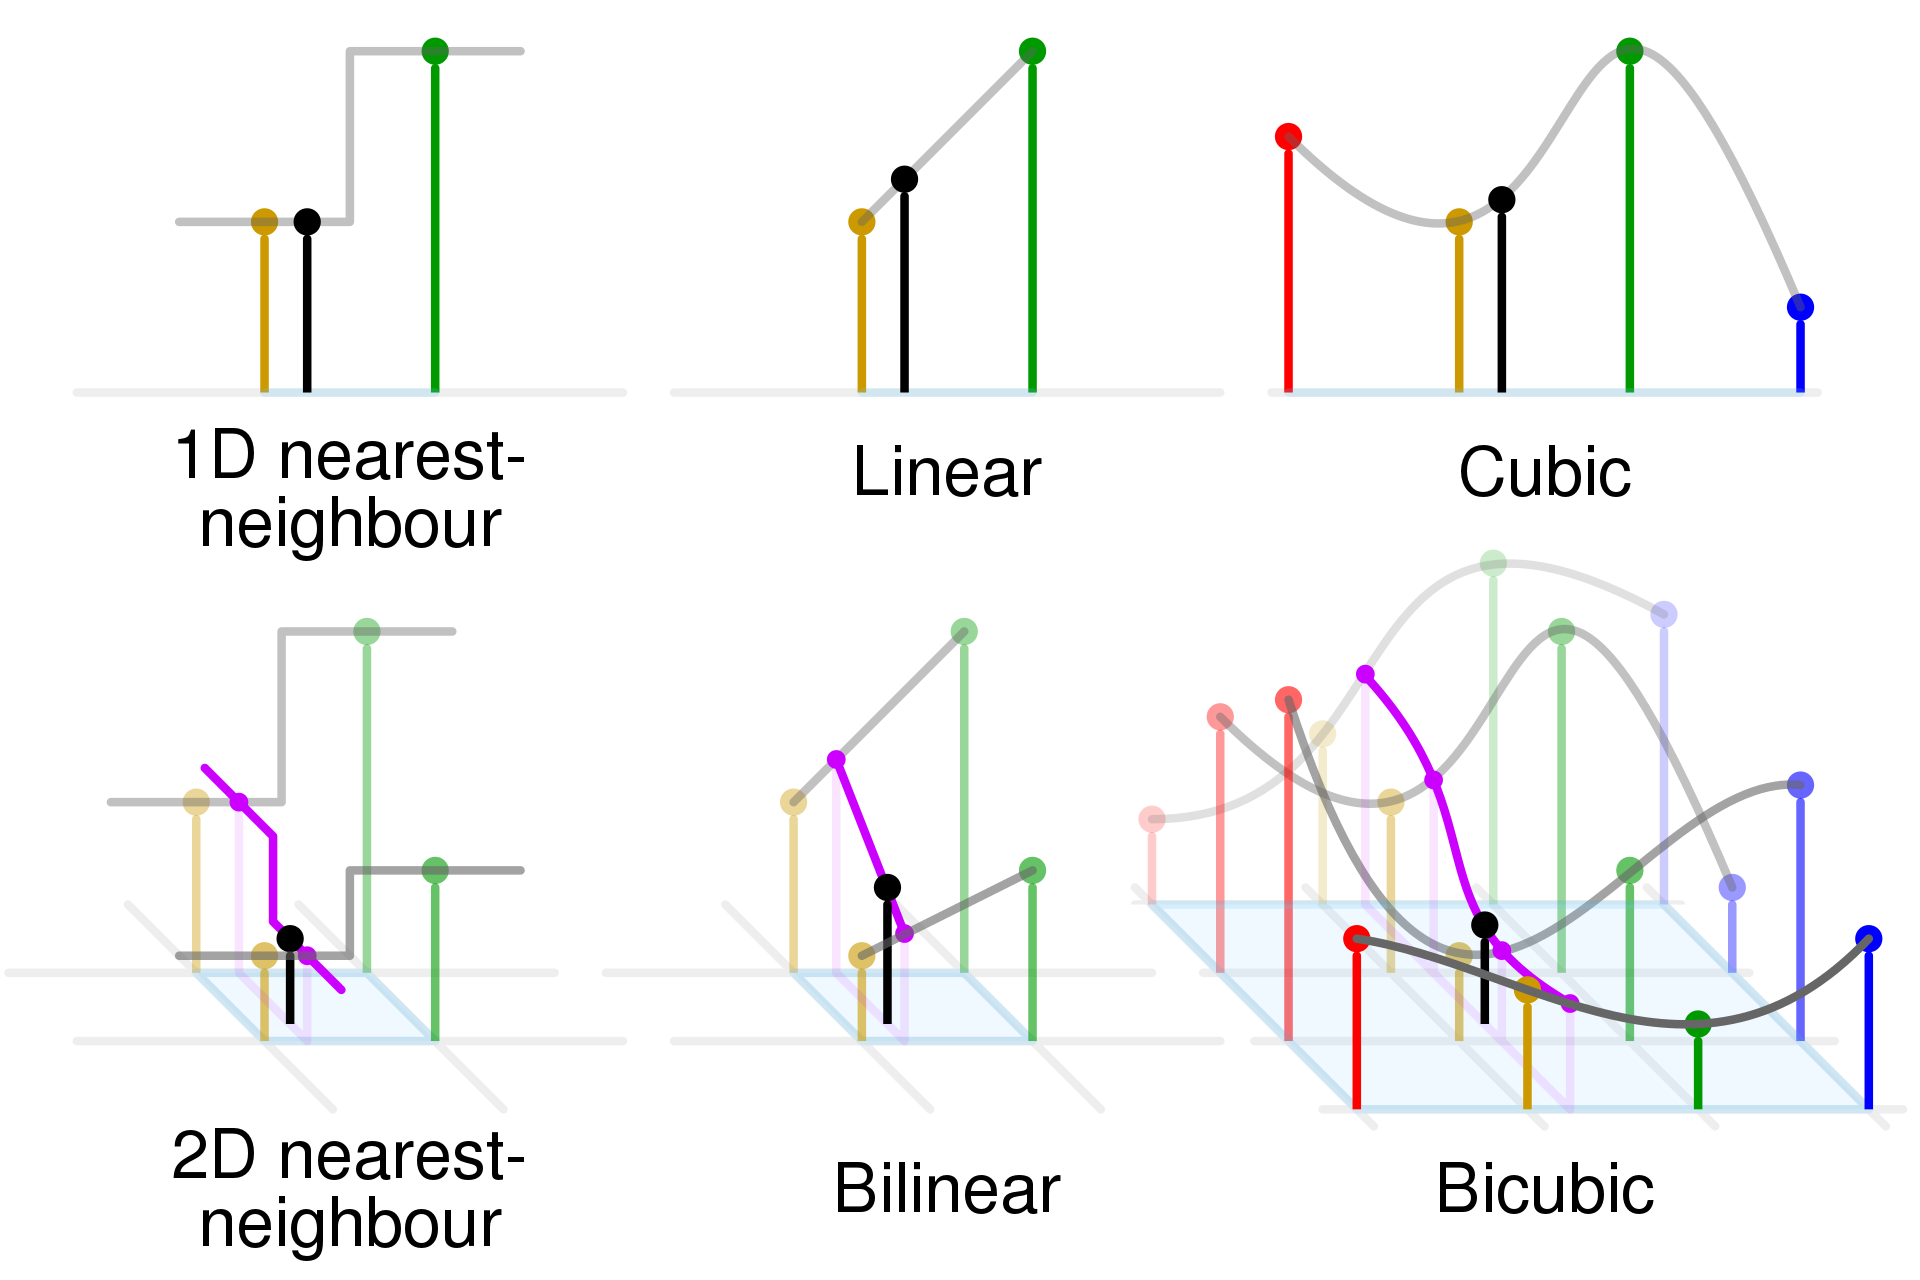

Interpolation Formula: a weighted sum of the pixel values of the surrounding 16 points

$$
\begin{gathered}
W(x)= \begin{cases}(a+2)|x|^3-(a+3)|x|^2+1 & \text { for }|x| \leq 1 \\
a|x|^3-5 a|x|^2+8 a|x|-4 a & \text { for } 1<|x|<2 \\
0 & \text { otherwise }\end{cases} \\
f(x, y)=\sum_{j=0}^3 \sum_{j=0}^3 f\left(x_i, y_j\right) W\left(x-x_i\right) W\left(y-y_j\right)
\end{gathered}
$$

For more details, please read https://en.wikipedia.org/wiki/Bicubic_interpolation.

## Code Example

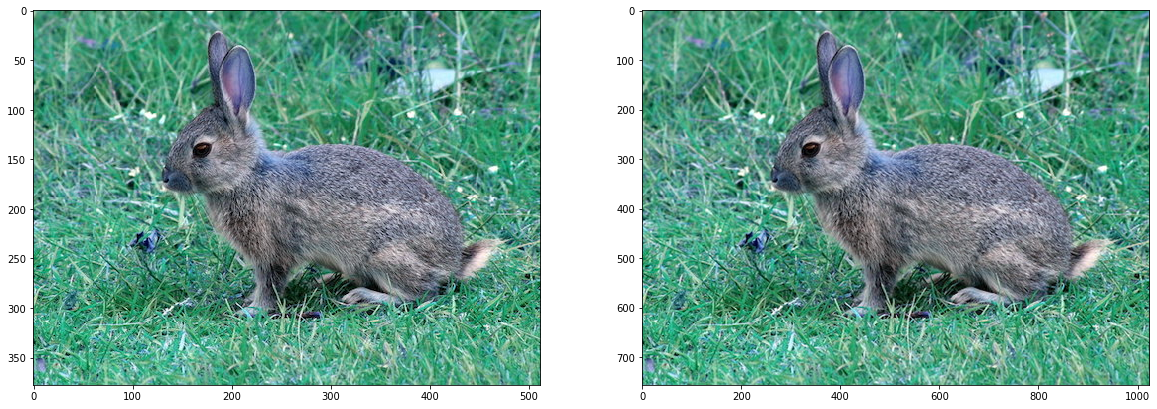

In [3]:
import cv2
import matplotlib.pyplot as plt

image_rab     = cv2.imread('./rabbit.jpg')
H, W, C       = image_rab.shape
image_cubic   = cv2.resize(image_rab, dsize=(2*W, 2*H), interpolation=cv2.INTER_CUBIC)
cv2.imwrite('rabbit_cubic.jpg', image_cubic)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image_rab)
plt.subplot(122)
plt.imshow(image_cubic)
plt.show()

# cv2.resize
## Function Prototype

| Parameters | Descriptions |
| :----:| :----: |
| src | [required] source/input image |
| dsize | [required] desired size for the output image |
| fx	| [optional] scale factor along the horizontal axis |
| fy	| [optional] scale factor along the vertical axis |
| interpolation	  |  [optional] flag that takes an interpolation methods |

## Interpolation Methods
| Methods (Flag) | Descriptions |
| :----:| :----: |
| INTER_NEAREST | A nearest-neighbor interpolation |
| INTER_LINEAR | A bilinear interpolation (used by default) |
| INTER_AREA | Resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method |
| INTER_CUBIC | A bicubic interpolation over 4×4 pixel neighborhood |
| INTER_LANCZOS4  | A Lanczos interpolation over 8×8 pixel neighborhood |

## Code Implementation

resize1: (567, 768, 3)
resize2: (567, 768, 3)


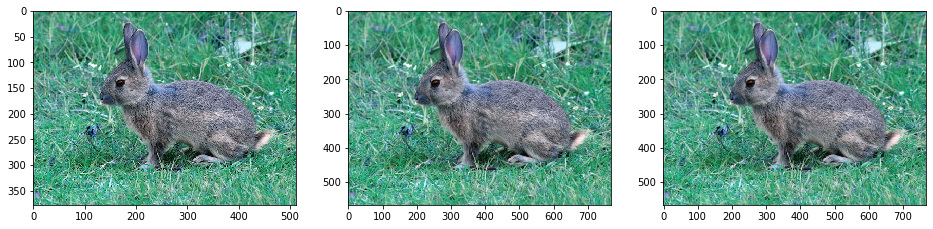

In [4]:
import cv2
import matplotlib.pyplot as plt


image    = cv2.imread('./rabbit.jpg')
H,W,C    = image.shape
resize1  = cv2.resize(image, dsize=(int(W*1.5), int(H*1.5)), interpolation=cv2.INTER_LINEAR)  #dsize
resize2  = cv2.resize(image, dsize=None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)      #fx,fy
print('resize1:', resize1.shape)  # resize1: (111, 150, 3)
print('resize2:', resize2.shape)  # resize2: (111, 150, 3)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(resize1)
plt.subplot(133)
plt.imshow(resize2)
plt.show()

# Affine Transformation

## Introduction
- Basic operations on images: translation, rotation, scaling, shearing.

- Assuming that there is a point with coordinates $(x,y)$ in the original image, after the affine transformation $T$, its coordinates on the target image are $(u, v)$, that is, $(u, v)=T(x,y)$),
$$
\left\{\begin{array}{l}
u=a_1 x+b_1 y+c_1 \\
v=a_2 x+b_2 y+c_2
\end{array}\right.
$$

- When $c_1 = 0$ and $c_2 = 0$, $T$ is a linear transformation; otherwise, $T$ does not satisfy the linear property.

- $T$ can also be rewritten in the form of matrix multiplication,
$$
\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{ccc}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
1
\end{array}\right]
$$

## Types of Affine Transformation

### Identity Transformation

The original image coordinates $(x,y)$ will not change,

$$
\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
1
\end{array}\right]
$$

Use the OpenCV function cv::warpAffine to implement simple remapping routines, where the transmation matrix $T$ is a 2×3 matrix.

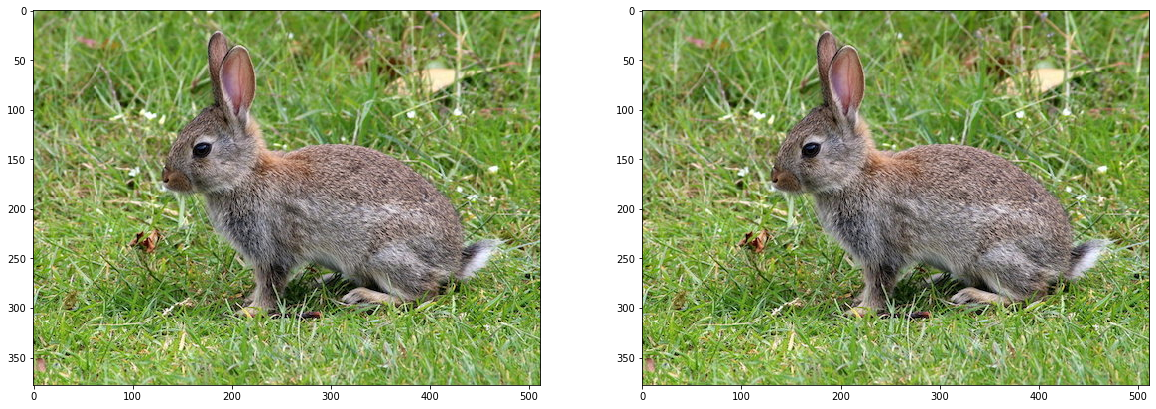

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./rabbit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
H,W,C = image.shape

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)

T = np.array([[1, 0, 0],
              [0, 1, 0]], np.float32)
image = cv2.warpAffine(image, T, dsize=(W, H))
plt.subplot(122)
plt.imshow(image)
plt.show()

### Translation Transformation

The original image coordinates coordinates $(x,y)$ translate along $(t_x, t_y)$,

$$
\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{ccc}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
1
\end{array}\right]
$$

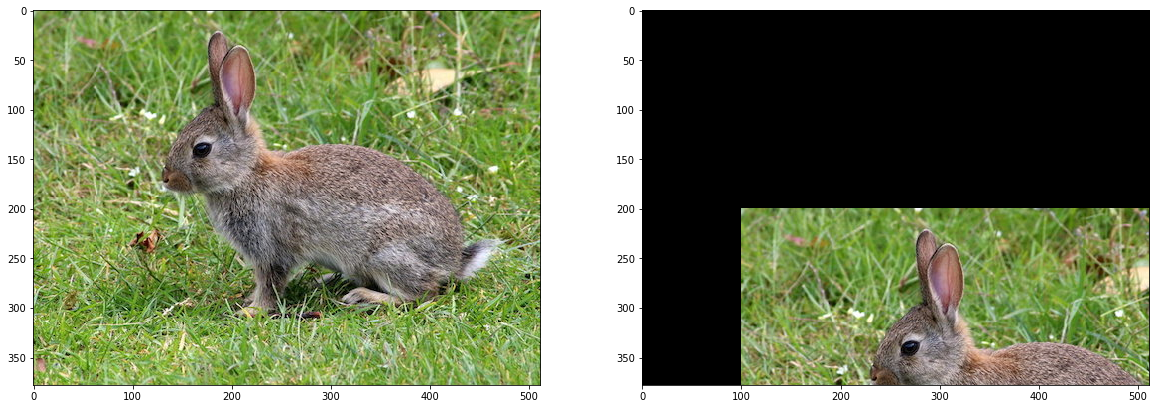

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./rabbit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
H,W,C = image.shape
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)

T = np.array([[1, 0, 100],
              [0, 1, 200]], np.float32)
image = cv2.warpAffine(image, T, dsize=(W, H))
plt.subplot(122)
plt.imshow(image)
plt.show()

### Scale Transformation

The original image coordinates coordinates $(x,y)$ scale with $(t_x, t_y)$,

$$
\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{ccc}
t_x & 0 & 0 \\
0 & t_y & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
1
\end{array}\right]
$$

Use the OpenCV function cv::getRotationMatrix2D to obtain a 2×3 rotation matrix

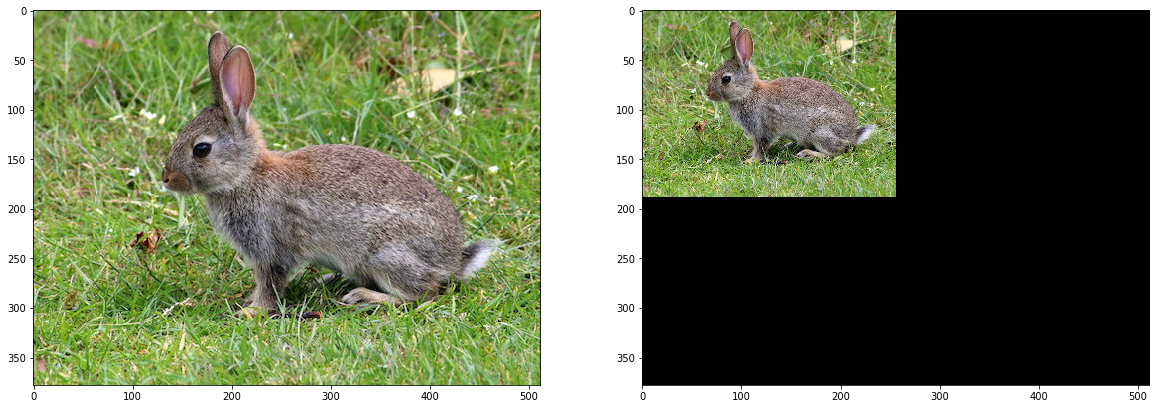

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./rabbit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
H,W,C = image.shape
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)

T = np.array([[0.5, 0, 0],
              [0, 0.5, 0]], np.float32)
image = cv2.warpAffine(image, T, dsize=(W, H))
plt.subplot(122)
plt.imshow(image)
plt.show()

### Shear Transformation

Shear transformation happens on the original image coordinates $(x,y)$,

$$
\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{ccc}
1 & t_y & 0 \\
t_x & 1 & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
1
\end{array}\right]
$$

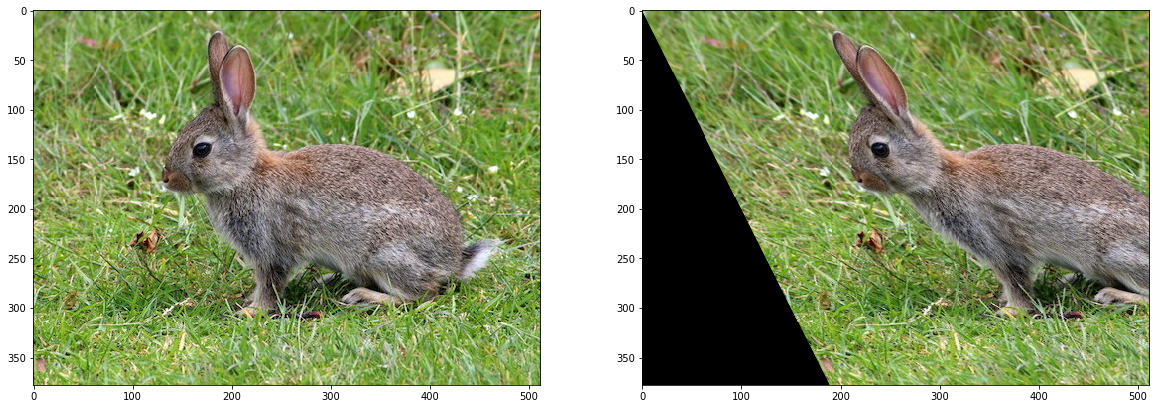

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./rabbit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
H,W,C = image.shape
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)

T = np.array([[1, 0.5, 0],
              [0,   1, 0]], np.float32)
image = cv2.warpAffine(image, T, dsize=(W, H))
plt.subplot(122)
plt.imshow(image)
plt.show()

### Rotation Transformation

Rotate the original image by $\theta$,

$$
\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{ccc}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
1
\end{array}\right]
$$

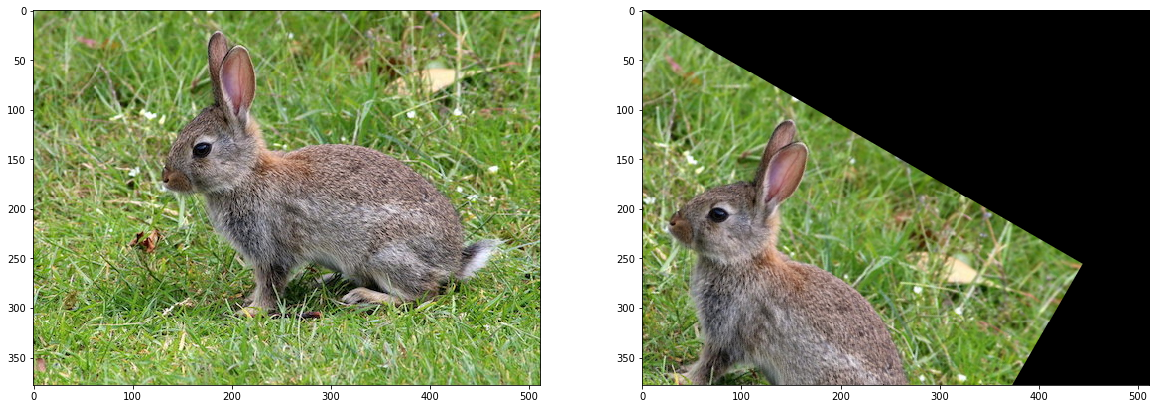

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./rabbit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
H,W,C = image.shape
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image)

T = np.array([[np.cos(np.pi/6), -np.sin(np.pi/6), 0],
              [np.sin(np.pi/6), np.cos(np.pi/6),  0]], np.float32)
image = cv2.warpAffine(image, T, dsize=(W, H))
plt.subplot(122)
plt.imshow(image)
plt.show()

# Two Mapping Methods
Both forward mapping and backward mapping are the process of geometrically transforming an image to obtain another image. Their purpose is to obtain the pixels of the target image, but in different ways. Any geometric transformation, including an affine transformation, can be implemented as forward or backward mapping.

## Forward Mapping

The essence of image transformation is to map the coordinates of pixels to another position through a certain functional relationship. 

The process of forward mapping can be broken down into two steps: a) coordinate transformation; b) assigning pixel values.

Consider each input image pixel in turn. For each input image pixel:

1. Determine its location in input space, $(u_k,v_k)$;
2. Map that location to output space using $(x_k,y_k) = T\{(u_k,v_k)\}$;
3. Figure out which output pixel contains the location $(x_k,y_k)$;
4. Copy the input pixel value to that output pixel.

This diagram illustrates the procedure:

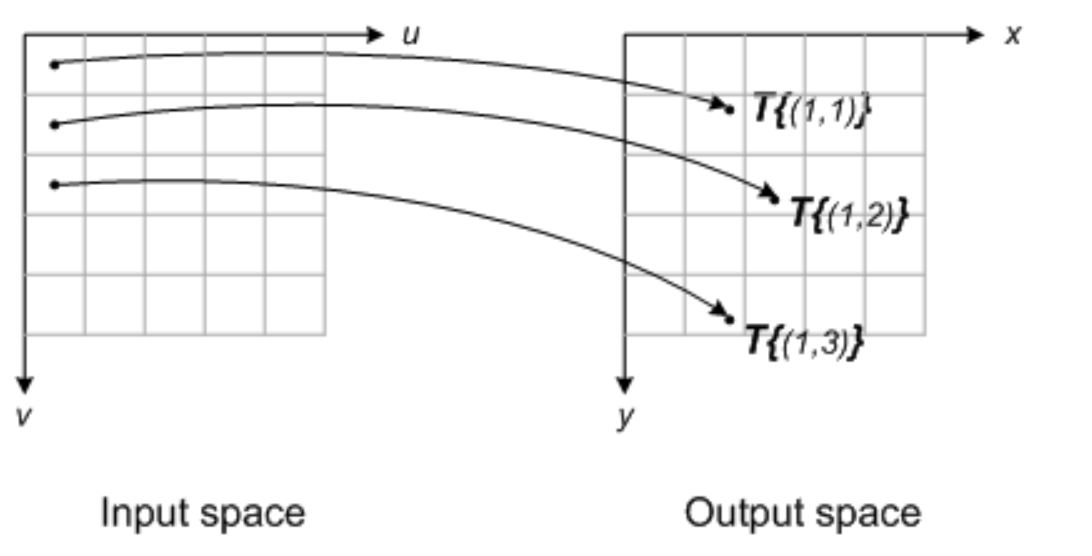

Forward mapping has two main disadvantages as a computational procedure: gaps and overlaps.

Depending on specific spatial transform function, you may have some output pixels that did not receive any input image pixels; these are the gaps. You may also have some output pixels that received more than one input image pixel; these are the overlaps. In both cases, it is challenging to figure out a reasonable way to set those output pixels.

One way to overcome these problems is to map pixel rectangles in input space to output space quadrilaterals, as shown here:

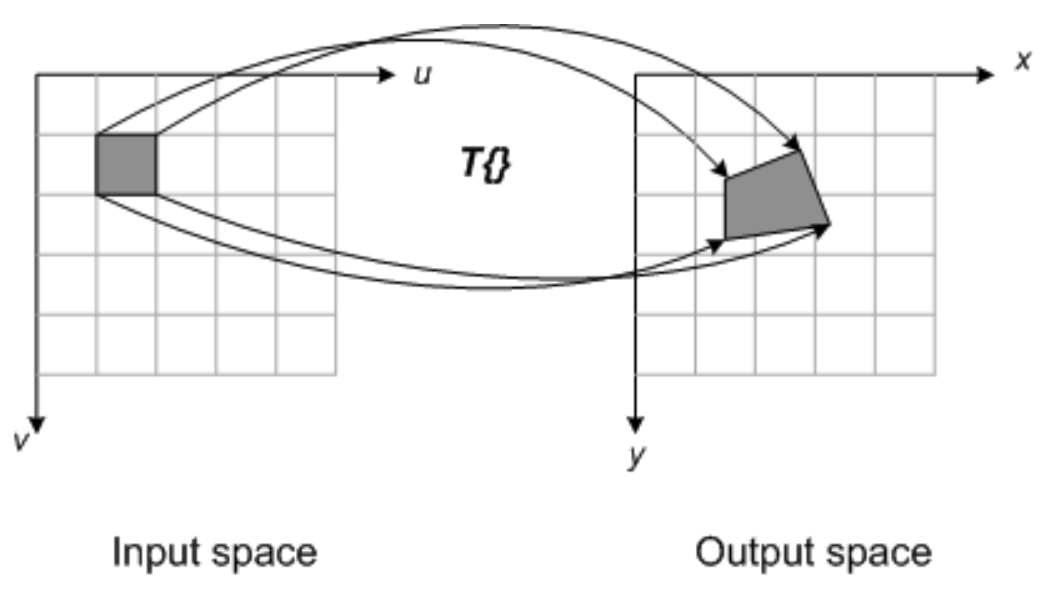

With this procedure, the input pixel value is allocated to different output pixels depending on the relative fractional coverage of the quadrilateral. Although this procedure can produce good results, it is complicated to implement and it takes a long time to compute.

In [10]:
def apply_transformation(original_x: int, original_y: int):
    # define the rotation matrix   
    rotate_transformation = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
                                      [np.sin(np.pi/4),  np.cos(np.pi/4), 0],
                                      [0, 0, 1]])
    # apply transformation after setting homogenous coordinate to 1 for the original vector.
    new_coordinates = rotate_transformation @ np.array([original_x, original_y, 1]).T
    # round the new coordinates to the nearest pixel   
    return int(np.rint(new_coordinates[0])), int(np.rint(new_coordinates[1]))

In [11]:
def forward_mapping(original_image: np.ndarray):
    # create the new image with same shape as the original one
    new_image = np.zeros_like(original_image)
    for original_y in range(original_image.shape[1]):
        for original_x in range(original_image.shape[0]):
            # apply rotation on the original pixel's coordinates
            new_x, new_y = apply_transformation(original_x, original_y)
            # check if new coordinates fall inside the image's domain
            if 0 <= new_y < new_image.shape[1] and 0 <= new_x < new_image.shape[0]:
                new_image[new_x, new_y, :] = original_image[original_x, original_y, :]

    return new_image

## Backward Mapping

The process of backward mapping can be decomposed into two steps: a) coordinate transformation; b) interpolation. Coordinate transformation of backward mapping: the position of the pixel in the original image is inversely estimated from the output image coordinates.

1. Locate your output image pixel grid somewhere in output space. Then for each output pixel on the grid;
2. Apply the inverse spatial transformation to determine the corresponding location in input space: $(u_k,v_k) = T^{-1}\{(x_k,y_k)\}$.
3. Using the input image pixels nearest to $(u_k,v_k)$, interpolate to get an approximate value for the input image at $(u_k,v_k)$.
4. Use that value for the $k$-th output pixel.

This diagram illustrates the procedure:

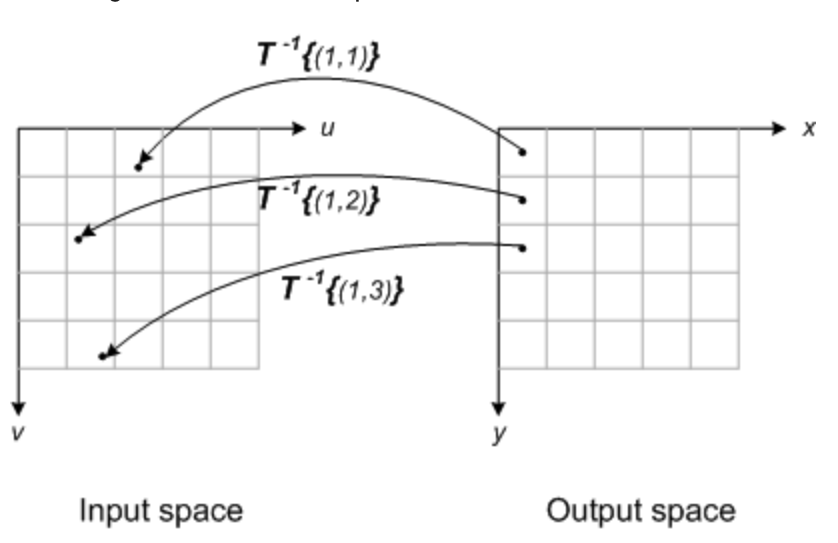

This method completely avoids problems with gaps and overlaps in forward mapping. You just have to decide which interpolation method to you, and you also have to establish a rule for what value to use when $(u_k,v_k)$ is not within the input image pixel grid.

In [12]:
def apply_inverse_transformation(new_x: int, new_y: int):
    # define the inverse rotation matrix
    rotate_transformation = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
                                      [np.sin(np.pi/4),  np.cos(np.pi/4), 0],
                                      [0, 0, 1]])
    inverse_rotate_transformation = np.linalg.inv(rotate_transformation)

    # apply transformation after setting homogenous coordinate to 1 for the position vector.
    original_coordinates = inverse_rotate_transformation @ np.array([new_x, new_y, 1]).T
    # round the original coordinates to the nearest pixel
    return int(np.rint(original_coordinates[0])), int(np.rint(original_coordinates[1]))

In [13]:
def backward_mapping(original_image: np.ndarray):
    # create the new image with same shape as the original one
    new_image = np.zeros_like(original_image)
    for new_y in range(new_image.shape[1]):
        for new_x in range(new_image.shape[0]):
            # apply inverse rotation on the new pixel's coordinates
            original_x, original_y = apply_inverse_transformation(new_x, new_y)
            # check if original coordinates fall inside the image's domain
            if 0 <= original_y < original_image.shape[1] and 0 <= original_x < original_image.shape[0]:
                new_image[new_x, new_y, :] = original_image[original_x, original_y, :]

    return new_image